In [1]:
#Data saved in csv/excel
import glob, os
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [17]:
#Set two decimal points for display
pd.options.display.float_format = "{:.2f}".format

# Load the scores calculated by Aaron

In [40]:
sc =pd.read_csv('C:/Users/tsb7592/OneDrive - Northwestern University/Analysis Progress/ScoreRecords_test3.csv')

In [41]:
sc.shape

(108, 67)

In [42]:
cdi = pd.read_csv('C:/Users/tsb7592/OneDrive - Northwestern University/Analysis Progress/cdi_scores.csv')

In [43]:
cdi.shape

(90, 10)

In [44]:
sc['DYAD']=sc['DYAD'].astype(str)

In [45]:
dyads = pd.read_excel('C:\\Users\\tsb7592\\OneDrive - Northwestern University\\Analysis Progress\\NBT_dyads.xlsx')

In [46]:
dyads['DYAD']=dyads['DYAD'].astype(str)

In [47]:
dyads.columns=['DYAD', 'PIN', 'Note','Name','Assessment Name']

In [48]:
dyads['PIN']=dyads['PIN'].str.upper()

In [49]:
spe = dyads[~dyads['Note'].isnull()]
spe

,DYAD,PIN,Note,Name,Assessment Name
19,8,WI008P,"Name=""Greyson"" or AssessmentName=""Assessment 2""",Greyson,Assessment 2
22,9,WI008P,"Name=""Liam"" or AssessmentName=""Assessment 1""",Liam,Assessment 1
147,68,TX011C,"Name=""Semilore Atanda""",Semilore Atanda,NaN
151,69,TX011C,"Name=""Olivia""",Olivia,NaN


In [50]:
c1= pd.merge(cdi,spe, on =['PIN','Assessment Name'])
c1

,PIN,Assessment Name,Inst.x,Age_month,Age_group,Exp_theta,Exp_sem,Inst.y,Rec_theta,Rec_sem,DYAD,Note,Name
0,WI008P,Assessment 2,CDI: Expressive,NaN,NaN,-0.849577,0.167758,NaN,NaN,NaN,8,"Name=""Greyson"" or AssessmentName=""Assessment 2""",Greyson
1,WI008P,Assessment 1,NaN,284.0,"(215, 1000]",NaN,NaN,CDI: Receptive,-3.19216,0.805734,9,"Name=""Liam"" or AssessmentName=""Assessment 1""",Liam


In [51]:
dyads =dyads.drop(columns=['Assessment Name'])

In [52]:
c2= pd.merge(cdi,dyads[dyads['Note'].isnull()], on ='PIN')
c2

,PIN,Assessment Name,Inst.x,Age_month,Age_group,Exp_theta,Exp_sem,Inst.y,Rec_theta,Rec_sem,DYAD,Note,Name
0,MO020P,Assessment 1,CDI: Expressive,366.0,"(215, 1000]",2.015441,0.172556,NaN,NaN,NaN,104,NaN,NaN
1,WI026P,Assessment 2,CDI: Expressive,411.0,"(215, 1000]",inf,NaN,NaN,NaN,NaN,26,NaN,NaN
2,MN022P,Assessment 1,CDI: Expressive,383.0,"(215, 1000]",-2.822105,0.549201,CDI: Receptive,0.689969,0.162028,55,NaN,NaN
3,WI029P,Assessment 1,CDI: Expressive,NaN,NaN,-0.885553,0.120801,CDI: Receptive,0.797386,0.148381,29,NaN,NaN
4,MN015P,Assessment 2,CDI: Expressive,445.0,"(215, 1000]",1.188057,0.128961,NaN,NaN,NaN,48,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,TX018P,Assessment 1,NaN,NaN,NaN,NaN,NaN,CDI: Receptive,-4.005888,1.089575,75,NaN,NaN
84,TX024P,Assessment 1,NaN,273.0,"(215, 1000]",NaN,NaN,CDI: Receptive,-inf,NaN,81,NaN,NaN
85,MN004P,Assessment 1,NaN,265.0,"(215, 1000]",NaN,NaN,CDI: Receptive,-1.493234,0.350310,37,NaN,NaN
86,TX010P,Assessment 1,NaN,NaN,NaN,NaN,NaN,CDI: Receptive,-inf,NaN,67,NaN,NaN


In [53]:
cdi = c1.append(c2)

In [54]:
cdi.columns =['CaregiverPIN', 'Assessment Name', 'Inst.x', 'Age_month', 'Age_group',
       'CDI_Exp_theta', 'Exp_sem', 'Inst.y', 'CDI_Rec_theta', 'Rec_sem', 'DYAD',
       'Note', 'Name']

In [55]:
kc =['CaregiverPIN','DYAD', 'Assessment Name', 'Age_month', 'Age_group', 'CDI_Exp_theta', 'CDI_Rec_theta']

In [56]:
cdi=cdi[kc].drop_duplicates()

In [57]:
sc=sc.drop(columns=[ 'CDI_Exp_theta', 'CDI_Rec_theta'])

In [58]:
sc2=pd.merge(sc, cdi[kc], on =['DYAD'], how='left')

In [59]:
sc2.shape

(109, 71)

In [60]:
sc2['Assessment Name']= sc2['Assessment Name_x'].fillna(sc2['Assessment Name_y'])
sc2['Age_month']= sc2['Age_month_x'].fillna(sc2['Age_month_y'])
sc2['Age_group'] =sc2['Age_group_x'].fillna(sc2['Age_group_y'])
sc2['CaregiverPIN'] =sc2['CaregiverPIN_x'].fillna(sc2['CaregiverPIN_y'])

In [61]:
keep =['DYAD', 'ChildPIN', 'CaregiverPIN', 'Assessment Name', 'Age_month',
       'Age_group', 'SelfReg_SurgIBQR', 'SelfReg_NegAffIBQR',
       'SelfReg_EffContIBQR', 'SelfReg_SurgECBQ', 'SelfReg_NegAffECBQ',
       'SelfReg_EffContECBQ', 'SelfReg_SurgCBQ', 'SelfReg_NegAffCBQ',
       'SelfReg_EffContCBQ', 'PA_2', 'PA_3', 'frus_reg', 'frus_escalation',
       'frus_cope', 'CDI_Exp_theta', 'CDI_Rec_theta', 'Give_N', 'GlobalSR',
       'MYLLM', 'MemTest', 'Mul_Exp', 'Mul_Rec', 'PVT', 'NR_S', 'VerbCt',
       'ObjCt', 'PROMIS_CC_Int', 'PROMIS_PR', 'REMA', 'ShpM_Man', 'ShpM_I',
       'VDR', 'WHM', 'Phys_DP4_SS', 'AB_DP4_SS', 'SE_DP4_SS', 'Cog_DP4_SS',
       'Comm_DP4_SS', 'GDS_DP4_SS', 'Phys_DP4_GSV', 'AB_DP4_GSV', 'SE_DP4_GSV',
       'Cog_DP4_GSV', 'Comm_DP4_GSV', 'GDS_DP4_GSV', 'GM_MSEL_raw',
       'VR_MSEL_raw', 'FM_MSEL_raw', 'RL_MSEL_raw', 'EL_MSEL_raw',
       'GM_MSEL_Tscr', 'VR_MSEL_Tscr', 'FM_MSEL_Tscr', 'RL_MSEL_Tscr',
       'EL_MSEL_Tscr', 'ELC_MSEL_Tscr', 'GM_MSEL_AE', 'VR_MSEL_AE',
       'FM_MSEL_AE', 'RL_MSEL_AE', 'EL_MSEL_AE']

In [62]:
sc2=sc2[keep]

# Mul rec

In [63]:
sc2=sc2.drop(columns=[ 'Mul_Rec'])

In [64]:
mul = pd.read_csv('C:/Users/tsb7592/OneDrive - Northwestern University/Analysis Progress/MulRec_scores.csv')

In [65]:
mul.columns =['ChildPIN','Assessment Name', 'Age_month','Inst','Mul_Rec' ]

In [66]:
mul=mul.drop(columns=['Inst'])

In [67]:
mul.head()

,ChildPIN,Assessment Name,Age_month,Mul_Rec
0,TX009C,Assessment 2,18.0,6.0
1,TX005C,Assessment 2,29.0,18.0
2,APPLETONC1,Assessment 1,NaN,16.0
3,MO008C,Assessment 1,11.0,6.0
4,MN011C,Assessment 1,33.0,15.0


In [68]:
sc2=pd.merge(sc2, mul, on ='ChildPIN', how='left')

In [69]:
sc2['Assessment Name']= sc2['Assessment Name_x'].fillna(sc2['Assessment Name_y'])
sc2['Age_month']= sc2['Age_month_x'].fillna(sc2['Age_month_y'])

In [70]:
sc2=sc2[keep]

# Mul exp

In [71]:
sc2=sc2.drop(columns=[ 'Mul_Exp'])

In [72]:
mul = pd.read_csv('C:/Users/tsb7592/OneDrive - Northwestern University/Analysis Progress/Mullen_expressive.csv')

In [73]:
mul.head()

,PIN,Assessment Name,rawSum
0,TX009C,Assessment 2,8
1,TX005C,Assessment 2,13
2,APPLETONC1,Assessment 1,11
3,MO008C,Assessment 1,7
4,MN011C,Assessment 1,15


In [74]:
mul.columns =['ChildPIN','Assessment Name','Mul_Exp' ]

In [75]:
sc2=pd.merge(sc2, mul, on ='ChildPIN', how='left')

In [76]:
sc2['Assessment Name']= sc2['Assessment Name_x'].fillna(sc2['Assessment Name_y'])

In [77]:
sc2.columns

Index(['DYAD', 'ChildPIN', 'CaregiverPIN', 'Assessment Name_x', 'Age_month',
       'Age_group', 'SelfReg_SurgIBQR', 'SelfReg_NegAffIBQR',
       'SelfReg_EffContIBQR', 'SelfReg_SurgECBQ', 'SelfReg_NegAffECBQ',
       'SelfReg_EffContECBQ', 'SelfReg_SurgCBQ', 'SelfReg_NegAffCBQ',
       'SelfReg_EffContCBQ', 'PA_2', 'PA_3', 'frus_reg', 'frus_escalation',
       'frus_cope', 'CDI_Exp_theta', 'CDI_Rec_theta', 'Give_N', 'GlobalSR',
       'MYLLM', 'MemTest', 'Mul_Rec', 'PVT', 'NR_S', 'VerbCt', 'ObjCt',
       'PROMIS_CC_Int', 'PROMIS_PR', 'REMA', 'ShpM_Man', 'ShpM_I', 'VDR',
       'WHM', 'Phys_DP4_SS', 'AB_DP4_SS', 'SE_DP4_SS', 'Cog_DP4_SS',
       'Comm_DP4_SS', 'GDS_DP4_SS', 'Phys_DP4_GSV', 'AB_DP4_GSV', 'SE_DP4_GSV',
       'Cog_DP4_GSV', 'Comm_DP4_GSV', 'GDS_DP4_GSV', 'GM_MSEL_raw',
       'VR_MSEL_raw', 'FM_MSEL_raw', 'RL_MSEL_raw', 'EL_MSEL_raw',
       'GM_MSEL_Tscr', 'VR_MSEL_Tscr', 'FM_MSEL_Tscr', 'RL_MSEL_Tscr',
       'EL_MSEL_Tscr', 'ELC_MSEL_Tscr', 'GM_MSEL_AE', 'VR_MSEL_AE'

In [78]:
sc2=sc2[keep]

In [79]:
sc2.shape

(115, 67)

 # Give N 

In [80]:
data=pd.read_csv('C:/Users/tsb7592/OneDrive - Northwestern University/Analysis Progress/Basic_Desc_output.csv')
data = data[data['Score'] !='SKIP']
data['PIN']=data['PIN'].str.upper()
data['DYAD']=data['DYAD'].astype(str)


In [81]:
data['Score']=pd.to_numeric(data['Score'])

In [82]:
def create_sum(df, colist, new, exception = None, allvalid=False):
    
    mni= df[df.ItemID.isin(colist)][['PIN','DYAD','ItemID','Score']]
    mni= mni.groupby(['PIN','DYAD','ItemID'])['Score'].sum().unstack()
    mni =mni.reset_index()
    if not allvalid:
        mni =mni[mni.notnull().all(1)]
    
    if exception:
        mni = mni[~mni.isin([exception]).any(axis=1)]
    
    mni[new]=mni.sum(axis=1)
    mni = mni.drop(columns = colist)
    
    mni.columns =['ChildPIN','DYAD',new]
    
    return mni.drop_duplicates()


In [83]:
given =create_sum(data, ['GN_3b','GN_4b',  'GN_2b', 'GN_1b'], 'Give_N')

In [84]:
given.head()

,ChildPIN,DYAD,Give_N
0,APPLETONC1,1,0.0
1,M018C,51,2.0
2,MN002C,35,0.0
3,MN007C,40,0.0
4,MN010C,43,0.0


In [85]:
sc2=sc2.drop(columns=[ 'Give_N'])

In [86]:
sc1=pd.merge(sc2, given, on =['ChildPIN','DYAD'], how='left')

In [87]:
sc=sc1[keep]

# GlobalSR

In [88]:
GSR = data[data['ItemID']=='SelfReg_Global_rating'][['PIN','DYAD','Score']]

In [89]:
GSR = GSR.drop_duplicates()
GSR.columns =['ChildPIN', 'DYAD', 'GlobalSR']

In [90]:
sc= sc.drop(columns =['GlobalSR'])

In [91]:
sc1 =pd.merge(sc, GSR, on=['ChildPIN','DYAD'], how='left')

In [92]:
sc=sc1[keep]

In [93]:
keep

['DYAD',
 'ChildPIN',
 'CaregiverPIN',
 'Assessment Name',
 'Age_month',
 'Age_group',
 'SelfReg_SurgIBQR',
 'SelfReg_NegAffIBQR',
 'SelfReg_EffContIBQR',
 'SelfReg_SurgECBQ',
 'SelfReg_NegAffECBQ',
 'SelfReg_EffContECBQ',
 'SelfReg_SurgCBQ',
 'SelfReg_NegAffCBQ',
 'SelfReg_EffContCBQ',
 'PA_2',
 'PA_3',
 'frus_reg',
 'frus_escalation',
 'frus_cope',
 'CDI_Exp_theta',
 'CDI_Rec_theta',
 'Give_N',
 'GlobalSR',
 'MYLLM',
 'MemTest',
 'Mul_Exp',
 'Mul_Rec',
 'PVT',
 'NR_S',
 'VerbCt',
 'ObjCt',
 'PROMIS_CC_Int',
 'PROMIS_PR',
 'REMA',
 'ShpM_Man',
 'ShpM_I',
 'VDR',
 'WHM',
 'Phys_DP4_SS',
 'AB_DP4_SS',
 'SE_DP4_SS',
 'Cog_DP4_SS',
 'Comm_DP4_SS',
 'GDS_DP4_SS',
 'Phys_DP4_GSV',
 'AB_DP4_GSV',
 'SE_DP4_GSV',
 'Cog_DP4_GSV',
 'Comm_DP4_GSV',
 'GDS_DP4_GSV',
 'GM_MSEL_raw',
 'VR_MSEL_raw',
 'FM_MSEL_raw',
 'RL_MSEL_raw',
 'EL_MSEL_raw',
 'GM_MSEL_Tscr',
 'VR_MSEL_Tscr',
 'FM_MSEL_Tscr',
 'RL_MSEL_Tscr',
 'EL_MSEL_Tscr',
 'ELC_MSEL_Tscr',
 'GM_MSEL_AE',
 'VR_MSEL_AE',
 'FM_MSEL_AE',
 'RL_MSE

# MYLLM

In [94]:
MY6 =create_sum(data, ['MYLLM_t5', 'MYLLM_t6', 'MYLLM_t1',
       'MYLLM_t2', 'MYLLM_t3', 'MYLLM_t4'], 'MYLLM')

In [95]:
sc= sc.drop(columns =['MYLLM'])

In [96]:
sc1 =pd.merge(sc, MY6, on=['ChildPIN','DYAD'], how='left')

In [97]:
sc=sc1[keep]

# Memory test

In [98]:
mt =create_sum(data, ['MemTest_1.1',
       'MemTest_1.2', 'MemTest_1.3', 'MemTest_1.4', 'MemTest_1.5',
       'MemTest_1.6', 'MemTest_1.7', 'MemTest_1.8', 'MemTest_1.9',
       'MemTest_1.10'],'MemTest')

In [99]:
mt.head()

,ChildPIN,DYAD,MemTest
0,APPLETONC1,1,5.0
1,M018C,51,1.0
2,MN002C,35,2.0
3,MN006C,39,5.0
4,MN007C,40,9.0


In [100]:
sc= sc.drop(columns =['MemTest'])
sc1 =pd.merge(sc, mt, on=['ChildPIN','DYAD'], how='left')

In [101]:

sc=sc1[keep]

# PVT

In [102]:
pvt =create_sum(data, [ 'LAVOC011', 'LAVOC014', 'LAVOC022',
       'LAVOC029', 'LAVOC042', 'LAVOC044', 'LAVOC047', 'LAVOC049', 'LAVOC057',
       'LAVOC078', 'LAVOC081', 'LAVOC084', 'LAVOC086', 'LAVOC088', 'LAVOC093',
       'LAVOC105', 'LAVOC110', 'LAVOC123', 'LAVOC131', 'LAVOC132', 'LAVOC143',
       'LAVOC148', 'LAVOC236', 'LAVOC337', 'LAVOC339'],'PVT',2)

In [103]:
pvt.tail()

,ChildPIN,DYAD,PVT
33,WI011C,11,13.0
34,WI017C,17,15.0
36,WI023,23,14.0
37,WI025C,25,7.0
38,WI026C,26,11.0


In [104]:
sc= sc.drop(columns =['PVT'])
sc1 =pd.merge(sc, pvt, on=['ChildPIN','DYAD'], how='left')

sc=sc1[keep]

# Number recognition 

In [105]:
ns =create_sum(data, [ 'NRS_UnT_4SqR',
       'NRS_UnT_3InR', 'NRS_UnT_1InR', 'NRS_UnT_2InR'],'NR_S')

In [106]:
ns.head()

,ChildPIN,DYAD,NR_S
0,APPLETONC1,1,1.0
1,MN002C,35,2.0
2,MN006C,39,0.0
3,MN007C,40,2.0
4,MN010C,43,4.0


In [107]:
sc= sc.drop(columns =['NR_S'])
sc1 =pd.merge(sc, ns, on=['ChildPIN','DYAD'], how='left')

sc=sc1[keep]

# Verbal Counting

In [108]:
vc =data[data.ItemID=='VC_2'][['PIN','DYAD','Score']]
vc['Score']= pd.to_numeric(vc['Score'])

In [109]:
vc['Score'] = vc['Score'].apply(lambda x: x if x <= 10 else 10)

In [110]:
vc.columns=['ChildPIN', 'DYAD', 'VerbCt']

In [111]:
#if VC_2 is between 0 and 10, this is just VC_2, otherwise truncate at 10 (negative numbers are inadmissable)ng
vc= vc.drop_duplicates()
vc

,ChildPIN,DYAD,VerbCt
18,TX011C,68,6.0
1225,TX011C,69,0.0
1500,TX009C,66,0.0
1740,TX005C,62,10.0
2282,APPLETONC1,1,0.0
...,...,...,...
43426,WI025C,25,10.0
43862,WI017C,17,0.0
44418,MO022C,106,0.0
45241,TX027C,84,0.0


In [112]:
sc= sc.drop(columns=['VerbCt'])

In [113]:
sc1= pd.merge(sc, vc, on =['ChildPIN','DYAD'], how='left')

In [114]:
sc1= sc1.drop_duplicates()

In [115]:
sc1.groupby("ChildPIN").filter(lambda x: len(x) > 2)[keep]

,DYAD,ChildPIN,CaregiverPIN,Assessment Name,Age_month,Age_group,SelfReg_SurgIBQR,SelfReg_NegAffIBQR,SelfReg_EffContIBQR,SelfReg_SurgECBQ,...,VR_MSEL_Tscr,FM_MSEL_Tscr,RL_MSEL_Tscr,EL_MSEL_Tscr,ELC_MSEL_Tscr,GM_MSEL_AE,VR_MSEL_AE,FM_MSEL_AE,RL_MSEL_AE,EL_MSEL_AE
67,68,TX011C,TX011P,Assessment 1,40.0,NaN,NaN,NaN,NaN,6.166667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,68,TX011C,TX011P,Assessment 1,40.0,NaN,NaN,NaN,NaN,6.166667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,68,TX011C,TX011P,Assessment 1,20.0,NaN,NaN,NaN,NaN,6.166667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,68,TX011C,TX011P,Assessment 1,20.0,NaN,NaN,NaN,NaN,6.166667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,68,TX011C,TX011P,Assessment 2,454.0,"(215, 1000]",NaN,NaN,NaN,6.166667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,68,TX011C,TX011P,Assessment 2,454.0,"(215, 1000]",NaN,NaN,NaN,6.166667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,68,TX011C,TX011P,Assessment 2,454.0,"(215, 1000]",NaN,NaN,NaN,6.166667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74,68,TX011C,TX011P,Assessment 2,454.0,"(215, 1000]",NaN,NaN,NaN,6.166667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [116]:
sc1=sc1.drop(index=[69,70])

In [117]:
sc1[keep].to_csv('C:/Users/tsb7592/OneDrive - Northwestern University/Analysis Progress/ScoreRecords_test22.csv', index=False)

# Object Counting

In [118]:
sc1.shape

(113, 67)

In [119]:
oc =create_sum(data,[ 'OC_1r', 'OC_2r', 'OC_3r', 'OC_4r'],'ObjCt')

In [120]:
oc.head()

,ChildPIN,DYAD,ObjCt
0,APPLETONC1,1,1.0
1,M018C,51,0.0
2,MN002C,35,0.0
3,MN006C,39,0.0
4,MN007C,40,2.0


In [121]:
sc1= sc1.drop(columns=['ObjCt'])

In [122]:
sc =pd.merge(sc1, oc, on=['ChildPIN','DYAD'], how="left")

In [123]:
sc.groupby("ChildPIN").filter(lambda x: len(x) > 2)[keep]

,DYAD,ChildPIN,CaregiverPIN,Assessment Name,Age_month,Age_group,SelfReg_SurgIBQR,SelfReg_NegAffIBQR,SelfReg_EffContIBQR,SelfReg_SurgECBQ,...,VR_MSEL_Tscr,FM_MSEL_Tscr,RL_MSEL_Tscr,EL_MSEL_Tscr,ELC_MSEL_Tscr,GM_MSEL_AE,VR_MSEL_AE,FM_MSEL_AE,RL_MSEL_AE,EL_MSEL_AE
67,68,TX011C,TX011P,Assessment 1,40.0,NaN,NaN,NaN,NaN,6.166667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,68,TX011C,TX011P,Assessment 1,40.0,NaN,NaN,NaN,NaN,6.166667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,68,TX011C,TX011P,Assessment 2,454.0,"(215, 1000]",NaN,NaN,NaN,6.166667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,68,TX011C,TX011P,Assessment 2,454.0,"(215, 1000]",NaN,NaN,NaN,6.166667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,68,TX011C,TX011P,Assessment 2,454.0,"(215, 1000]",NaN,NaN,NaN,6.166667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,68,TX011C,TX011P,Assessment 2,454.0,"(215, 1000]",NaN,NaN,NaN,6.166667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Relationship- child caregiver interactions

In [124]:
fam =create_sum(data, [ 'fam_ec10','fam_ec1',
       'fam_ec6', 'fam_ec4', 'fam_ec2'], 'PROMIS_CC_Int')

In [125]:
fam.head()

,ChildPIN,DYAD,PROMIS_CC_Int
0,APPLETONQ,1,24.0
1,MN002P,35,23.0
2,MN004P,37,17.0
3,MN006P,39,25.0
4,MN007P,40,24.0


In [126]:
sc= sc.drop(columns =['PROMIS_CC_Int'])
sc1 =pd.merge(sc, fam, on=['ChildPIN','DYAD'], how='left')

sc=sc1[keep]

# Relationship-peer relationship

In [127]:
data[data.Inst=='PROMIS EC Parent-Report SF v1.0 - Social Relationships - Peer Relationships 4a'].tail()

,DYAD,PIN,DeviceID,Assessment Name,Inst,ItemID,Response,Score,Position,ResponseTime,DateCreated,InstStarted,InstEnded,Age_month,Age_group
45163,96,MO012P,AA12C32E-3CCC-4FA8-9CDA-D4FCFDD70BB6,Assessment 1,PROMIS EC Parent-Report SF v1.0 - Social Relat...,peer_instructions,1,NaN,2,NaN,2021-12-05 12:29:02,2021-12-05 12:28:56,2021-12-05 12:29:21,408,"(215, 1000]"
45164,96,MO012P,AA12C32E-3CCC-4FA8-9CDA-D4FCFDD70BB6,Assessment 1,PROMIS EC Parent-Report SF v1.0 - Social Relat...,Pf2socabil6r_ec,3,3.0,3,13.979490,2021-12-05 12:29:16,2021-12-05 12:28:56,2021-12-05 12:29:21,408,"(215, 1000]"
45165,96,MO012P,AA12C32E-3CCC-4FA8-9CDA-D4FCFDD70BB6,Assessment 1,PROMIS EC Parent-Report SF v1.0 - Social Relat...,peer_ec2,3,3.0,4,1.807808,2021-12-05 12:29:18,2021-12-05 12:28:56,2021-12-05 12:29:21,408,"(215, 1000]"
45166,96,MO012P,AA12C32E-3CCC-4FA8-9CDA-D4FCFDD70BB6,Assessment 1,PROMIS EC Parent-Report SF v1.0 - Social Relat...,peer_ec3,3,3.0,5,1.733054,2021-12-05 12:29:19,2021-12-05 12:28:56,2021-12-05 12:29:21,408,"(215, 1000]"
45167,96,MO012P,AA12C32E-3CCC-4FA8-9CDA-D4FCFDD70BB6,Assessment 1,PROMIS EC Parent-Report SF v1.0 - Social Relat...,peer_ec4,3,3.0,6,1.699417,2021-12-05 12:29:21,2021-12-05 12:28:56,2021-12-05 12:29:21,408,"(215, 1000]"


In [128]:
peer =create_sum(data, [ 'peer_ec3','Pf2socabil6r_ec', 'peer_ec4', 'peer_ec2'], 'PROMIS_PR')

In [129]:
peer =peer.drop_duplicates()

In [130]:
sc= sc.drop(columns =['PROMIS_PR'])
sc1 =pd.merge(sc, peer, on=['ChildPIN','DYAD'], how='left')

sc=sc1[keep]

# REMA/

In [131]:
re =create_sum(data, ['REMA_1','REMA_2','REMA_3','REMA_4'], 'REMA')

In [132]:
re.head()

,ChildPIN,DYAD,REMA
0,APPLETONC1,1,0.0
1,MN010C,43,4.0
2,MN024C,57,4.0
3,MO003C,87,3.0
4,MO004C,88,0.0


In [133]:
sc= sc.drop(columns =['REMA'])
sc1 =pd.merge(sc, re, on=['ChildPIN','DYAD'], how='left')

sc=sc1[keep]

In [134]:
sc.shape

(113, 67)

# Shape Matching Manipulatives

In [135]:
sm =data[data.ItemID=='Correct_Shape_1'][['PIN','DYAD','Score']]

In [136]:
sm.columns=['ChildPIN', 'DYAD', 'ShpM_Man']

In [137]:
sm = sm.drop_duplicates()

In [138]:
sc =sc.drop(columns=['ShpM_Man'])

In [139]:
sc1 =pd.merge(sc, sm, on=['ChildPIN','DYAD'], how="left")

In [140]:

sc=sc1[keep]

In [141]:
sc.shape

(113, 67)

# Shape Matching Ipad

In [142]:
ipad=[ 'NumSM_1', 'NumSM_2',
       'NumSM_3', 'NumSM_4', 'NumSM_5', 'NumSM_6', 'NumSM_7', 'NumSM_8',
       'NumSM_9', 'NumSM_10', 'NumSM_11', 'NumSM_12', 'NumSM_13',
       'NumSM_14', 'NumSM_15', 'NumSM_16', 'NumSM_17', 'NumSM_18',
       'NumSM_19', 'NumSM_20', 'NumSM_21', 'NumSM_22', 'NumSM_23',
       'NumSM_24', 'NumSM_25', 'NumSM_26', 'NumSM_27', 'NumSM_28',
       'NumSM_29', 'NumSM_30', 'NumSM_31', 'NumSM_32', 'NumSM_33',
       'NumSM_34', 'NumSM_35', 'NumSM_36', 'NumSM_37', 'NumSM_38',
       'NumSM_39', 'NumSM_40', 'NumSM_41', 'NumSM_42', 'NumSM_43',
       'NumSM_44', 'NumSM_45', 'NumSM_46', 'NumSM_47',
       'NumSM_48', 'NumSM_49', 'NumSM_50', 'NumSM_51', 'NumSM_52',
       'NumSM_53', 'NumSM_54', 'NumSM_55']

In [143]:
si =create_sum(data, ipad, 'ShpM_I', None, True)

In [144]:
sc= sc.drop(columns =['ShpM_I'])
sc1 =pd.merge(sc, si, on=['ChildPIN','DYAD'], how='left')

sc=sc1[keep]

# Visual delayed response

In [145]:
vd=create_sum(data, ['VDRTouch_1',
       'VDRTouch_2', 'VDRTouch_3', 'VDRTouch_4', 'VDRTouch_5',
       'VDRTouch_6', 'VDRTouch_7', 'VDRTouch_8', 'VDRTouch_9',
       'VDRTouch_10', 'VDRTouch_11'], 'VDR')

In [146]:
sc= sc.drop(columns =['VDR'])
sc1 =pd.merge(sc, vd, on=['ChildPIN','DYAD'], how='left')

sc=sc1[keep]

In [147]:
sc1.groupby("ChildPIN").filter(lambda x: len(x) > 2)

,DYAD,ChildPIN,CaregiverPIN,Assessment Name,Age_month,Age_group,SelfReg_SurgIBQR,SelfReg_NegAffIBQR,SelfReg_EffContIBQR,SelfReg_SurgECBQ,...,FM_MSEL_Tscr,RL_MSEL_Tscr,EL_MSEL_Tscr,ELC_MSEL_Tscr,GM_MSEL_AE,VR_MSEL_AE,FM_MSEL_AE,RL_MSEL_AE,EL_MSEL_AE,VDR
67,68,TX011C,TX011P,Assessment 1,40.0,NaN,NaN,NaN,NaN,6.166667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0
68,68,TX011C,TX011P,Assessment 1,40.0,NaN,NaN,NaN,NaN,6.166667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0
69,68,TX011C,TX011P,Assessment 2,454.0,"(215, 1000]",NaN,NaN,NaN,6.166667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0
70,68,TX011C,TX011P,Assessment 2,454.0,"(215, 1000]",NaN,NaN,NaN,6.166667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0
71,68,TX011C,TX011P,Assessment 2,454.0,"(215, 1000]",NaN,NaN,NaN,6.166667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0
72,68,TX011C,TX011P,Assessment 2,454.0,"(215, 1000]",NaN,NaN,NaN,6.166667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0


# Who has more

In [148]:
whcol=['WHM10', 'WHM16', 'WHM15', 'WHM4', 'WHM18',
       'WHM5', 'WHM17', 'WHM2', 'WHM11', 'WHM7', 'WHM3', 'WHM14', 'WHM6',
       'WHM13', 'WHM12', 'WHM20', 'WHM1', 'WHM19', 'WHM8', 'WHM9']

In [149]:
wh =create_sum(data, whcol, 'WHM', None, True)

In [150]:
sc= sc.drop(columns =['WHM'])
sc1 =pd.merge(sc, wh, on=['ChildPIN','DYAD'], how='left')

sc=sc1[keep]

In [151]:
sc[keep].to_csv('C:/Users/tsb7592/OneDrive - Northwestern University/Analysis Progress/ScoreRecords_test4.csv', index=False)

In [154]:
sc.drop_duplicates()

,DYAD,ChildPIN,CaregiverPIN,Assessment Name,Age_month,Age_group,SelfReg_SurgIBQR,SelfReg_NegAffIBQR,SelfReg_EffContIBQR,SelfReg_SurgECBQ,...,VR_MSEL_Tscr,FM_MSEL_Tscr,RL_MSEL_Tscr,EL_MSEL_Tscr,ELC_MSEL_Tscr,GM_MSEL_AE,VR_MSEL_AE,FM_MSEL_AE,RL_MSEL_AE,EL_MSEL_AE
0,1,WI001C,WI001P,Assessment 1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,WI002C,WI002P,Assessment 2,7.0,NaN,4.461538,4.750000,5.250000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,WI003C,WI003P,Assessment 1,377.0,"(215, 1000]",4.153846,3.500000,3.833333,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,WI004C,WI004P,Assessment 1,NaN,NaN,NaN,NaN,NaN,5.583333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,WI005C,WI005P,Assessment 1,28.0,"(27, 30]",NaN,NaN,NaN,5.916667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,104,MO020C,MO020P,Assessment 1,366.0,"(215, 1000]",NaN,NaN,NaN,5.666667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,105,MO021C,MO021P,Assessment 1,6.0,NaN,6.384615,6.333333,5.666667,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,106,MO022C,MO022P,Assessment 1,508.0,"(215, 1000]",NaN,NaN,NaN,5.583333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111,107,MO023C,MO023P,Assessment 1,25.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [155]:
#Data saved in csv/excel
import glob, os
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

data_dir="R:/MSS/Research/Projects/Baby_Toolbox/WPS_DP4 data/WPS data/Data exports"
os.chdir(data_dir)

# DP-4

In [156]:
# the files should begin with 2021-11-1 or they should begin with 2021-12
afiles = glob.glob('R:/MSS/Research/Projects/Baby_Toolbox/WPS_DP4 data/WPS data/Data exports/*.txt')

doc =[]
for file in afiles:
    data = pd.read_csv(file)
    print(file)
    doc.append(data)
    
dpf = pd.concat(doc)


R:/MSS/Research/Projects/Baby_Toolbox/WPS_DP4 data/WPS data/Data exports\dp-4_export_2021-11-01_2021-12-14_6336c7ec-81db-4fd8-ade7-b314c534a3ce.txt
R:/MSS/Research/Projects/Baby_Toolbox/WPS_DP4 data/WPS data/Data exports\dp-4_export_2021-11-01_2021-12-14_859cfa45-1ca8-4049-989a-935e40d49cb3.txt
R:/MSS/Research/Projects/Baby_Toolbox/WPS_DP4 data/WPS data/Data exports\dp-4_export_2021-11-01_2021-12-14_c5fd2678-9697-48b8-999f-c4cbcdd84f96.txt
R:/MSS/Research/Projects/Baby_Toolbox/WPS_DP4 data/WPS data/Data exports\dp-4_export_2021-11-01_2021-12-14_dbac5c45-d906-462d-b3f4-9c6542cb8eb6.txt


In [157]:
dpf['ChildID']=dpf['ChildID'].str.upper()

In [158]:
dpf.head()

,ChildName,ChildID,DateOfBirth,Age,Gender,AdministrationFormId,Form,AgeAtTesting,RaterName,RelationshipToChild,...,AgeEQ-Cognitive,AgeEQ-Communication,AgeEQ-General Development Score,Growth-Physical,Growth-Adaptive Behavior,Growth-Social-Emotional,Growth-Cognitive,Growth-Communication,Growth-General Development Score,Unnamed: 246
0,NaN,MN002C,07/14/2019,2 years 5 months,Female,1609197,Parent/Caregiver Checklist,2 years 4 months,Mn002p,Father,...,2:8 to 2:11,3:0 to 3:5,NaN,530,484,500,508,536,NaN,NaN
1,NaN,MN003C,07/08/2021,5 months,Female,1610741,Parent/Caregiver Checklist,4 months,Mother,NaN,...,0:10 to 0:11,0:4 to 0:5,NaN,302,347,421,347,364,NaN,NaN
2,NaN,MN004C,03/24/2021,8 months,Female,1611268,Parent/Caregiver Checklist,8 months,Mn004p,Mother,...,1:0 to 1:1,0:8 to 0:9,NaN,345,373,438,366,407,NaN,NaN
3,NaN,MN006C,08/17/2019,2 years 3 months,Male,1614092,Parent/Caregiver Checklist,2 years 3 months,Sarah C,Mother,...,--,--,NaN,538,484,369,--,--,NaN,NaN
4,NaN,MN008C,04/22/2021,7 months,Female,1615434,Parent/Caregiver Checklist,7 months,Mn008p,Father,...,0:10 to 0:11,0:4 to 0:5,NaN,271,334,403,347,364,NaN,NaN


In [159]:
spe

,DYAD,PIN,Note,Name,Assessment Name
19,8,WI008P,"Name=""Greyson"" or AssessmentName=""Assessment 2""",Greyson,Assessment 2
22,9,WI008P,"Name=""Liam"" or AssessmentName=""Assessment 1""",Liam,Assessment 1
147,68,TX011C,"Name=""Semilore Atanda""",Semilore Atanda,NaN
151,69,TX011C,"Name=""Olivia""",Olivia,NaN


In [160]:
#olivia is 1 year 8 month, grayson is 2 year
d1= pd.merge(dpf,spe, left_on='ChildID', right_on='PIN')
d1=d1.drop(index=[1,2])
d1

,ChildName,ChildID,DateOfBirth,Age,Gender,AdministrationFormId,Form,AgeAtTesting,RaterName,RelationshipToChild,...,Growth-Social-Emotional,Growth-Cognitive,Growth-Communication,Growth-General Development Score,Unnamed: 246,DYAD,PIN,Note,Name,Assessment Name
0,NaN,WI008P,08/17/2019,2 years 3 months,Male,1612257,Parent/Caregiver Checklist,2 years 3 months,Paul Van Sistine,Father,...,471,430,467,NaN,NaN,8,WI008P,"Name=""Greyson"" or AssessmentName=""Assessment 2""",Greyson,Assessment 2
3,NaN,TX011C,03/20/2020,1 year 8 months,Female,1671693,Parent/Caregiver Checklist,1 year 9 months,Mother,NaN,...,486,430,467,NaN,NaN,69,TX011C,"Name=""Olivia""",Olivia,NaN


In [161]:
d2= pd.merge(dpf,dyads[dyads['Note'].isnull()],left_on='ChildID', right_on='PIN')
d2

,ChildName,ChildID,DateOfBirth,Age,Gender,AdministrationFormId,Form,AgeAtTesting,RaterName,RelationshipToChild,...,Growth-Adaptive Behavior,Growth-Social-Emotional,Growth-Cognitive,Growth-Communication,Growth-General Development Score,Unnamed: 246,DYAD,PIN,Note,Name
0,NaN,MN002C,07/14/2019,2 years 5 months,Female,1609197,Parent/Caregiver Checklist,2 years 4 months,Mn002p,Father,...,484,500,508,536,NaN,NaN,35,MN002C,NaN,NaN
1,NaN,MN003C,07/08/2021,5 months,Female,1610741,Parent/Caregiver Checklist,4 months,Mother,NaN,...,347,421,347,364,NaN,NaN,36,MN003C,NaN,NaN
2,NaN,MN004C,03/24/2021,8 months,Female,1611268,Parent/Caregiver Checklist,8 months,Mn004p,Mother,...,373,438,366,407,NaN,NaN,37,MN004C,NaN,NaN
3,NaN,MN006C,08/17/2019,2 years 3 months,Male,1614092,Parent/Caregiver Checklist,2 years 3 months,Sarah C,Mother,...,484,369,--,--,NaN,NaN,39,MN006C,NaN,NaN
4,NaN,MN008C,04/22/2021,7 months,Female,1615434,Parent/Caregiver Checklist,7 months,Mn008p,Father,...,334,403,347,364,NaN,NaN,41,MN008C,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,NaN,TX017C,01/29/2021,10 months,Female,1677933,Parent/Caregiver Checklist,11 months,Mother,NaN,...,400,438,382,425,NaN,NaN,74,TX017C,NaN,NaN
84,NaN,TX018C,04/25/2021,7 months,Male,1681544,Parent/Caregiver Checklist,8 months,Mother,NaN,...,360,421,347,348,NaN,NaN,75,TX018C,NaN,NaN
85,NaN,TX021C,11/16/2020,1 year,Female,1682411,Parent/Caregiver Checklist,1 year 1 month,Mother,NaN,...,412,446,382,425,NaN,NaN,78,TX021C,NaN,NaN
86,NaN,TX026C,07/18/2020,1 year 4 months,Female,1689829,Parent/Caregiver Checklist,1 year 5 months,Father,NaN,...,424,471,382,442,NaN,NaN,83,TX026C,NaN,NaN


In [162]:
dpf = d1.append(d2)

In [163]:
dpf.columns.to_list()

['ChildName',
 'ChildID',
 'DateOfBirth',
 'Age',
 'Gender',
 'AdministrationFormId',
 'Form',
 'AgeAtTesting',
 'RaterName',
 'RelationshipToChild',
 'AdminDate',
 'DateOfReport',
 'Clinician',
 'ConfidenceInterval',
 'Physical-1',
 'Physical-2',
 'Physical-3',
 'Physical-4',
 'Physical-5',
 'Physical-6',
 'Physical-7',
 'Physical-8',
 'Physical-9',
 'Physical-10',
 'Physical-11',
 'Physical-12',
 'Physical-13',
 'Physical-14',
 'Physical-15',
 'Physical-16',
 'Physical-17',
 'Physical-18',
 'Physical-19',
 'Physical-20',
 'Physical-21',
 'Physical-22',
 'Physical-23',
 'Physical-24',
 'Physical-25',
 'Physical-26',
 'Physical-27',
 'Physical-28',
 'Physical-29',
 'Physical-30',
 'Physical-31',
 'Physical-32',
 'Physical-33',
 'Physical-34',
 'Physical-35',
 'Physical-36',
 'Physical-37',
 'Adaptive Behavior-1',
 'Adaptive Behavior-2',
 'Adaptive Behavior-3',
 'Adaptive Behavior-4',
 'Adaptive Behavior-5',
 'Adaptive Behavior-6',
 'Adaptive Behavior-7',
 'Adaptive Behavior-8',
 'Adapt

In [164]:
dcol =['ChildID','DYAD',
 'Standard-Physical',
 'Standard-Adaptive Behavior',
 'Standard-Social-Emotional',
 'Standard-Cognitive',
 'Standard-Communication',
 'Standard-General Development Score',

 'Growth-Physical',
 'Growth-Adaptive Behavior',
 'Growth-Social-Emotional',
 'Growth-Cognitive',
 'Growth-Communication',
 'Growth-General Development Score']

In [165]:
dp=dpf[dcol]

In [166]:
dp.columns=['ChildPIN', 'DYAD', 'Phys_DP4_SS',
'AB_DP4_SS', 'SE_DP4_SS', 'Cog_DP4_SS', 'Comm_DP4_SS', 'GDS_DP4_SS',
 'Phys_DP4_GSV', 'AB_DP4_GSV', 'SE_DP4_GSV', 'Cog_DP4_GSV',
'Comm_DP4_GSV', 'GDS_DP4_GSV']

In [167]:
dp['CaregiverPIN'] = dp.ChildPIN.str[:5]+'P'

In [168]:
dp.ChildPIN = dp.ChildPIN.str[:5]+'C'

In [169]:
sc.shape

(113, 67)

In [170]:
sc=sc.drop(columns=[ 'Phys_DP4_SS',
'AB_DP4_SS', 'SE_DP4_SS', 'Cog_DP4_SS', 'Comm_DP4_SS', 'GDS_DP4_SS',
 'Phys_DP4_GSV', 'AB_DP4_GSV', 'SE_DP4_GSV', 'Cog_DP4_GSV',
'Comm_DP4_GSV', 'GDS_DP4_GSV','CaregiverPIN'])

In [171]:
dp =dp[~dp.ChildPIN.isnull()]

In [172]:
sc1 =pd.merge(sc, dp, on=['ChildPIN','DYAD'], how="left")

In [173]:
sc1=sc1.drop_duplicates()

In [174]:
sc1.shape

(114, 67)

In [175]:
sc1.groupby("ChildPIN").filter(lambda x: len(x) > 2)[['ChildPIN','Age_group','Comm_DP4_GSV']]

,ChildPIN,Age_group,Comm_DP4_GSV
68,TX011C,NaN,577
69,TX011C,NaN,577
70,TX011C,"(215, 1000]",577
71,TX011C,"(215, 1000]",577
72,TX011C,"(215, 1000]",577
73,TX011C,"(215, 1000]",577


In [176]:
sc1['CaregiverPIN'] = sc1.ChildPIN.str[:5]+'P'
sc1['ChildPIN'] = sc1.ChildPIN.str[:5]+'C'

In [177]:
sc1[keep].to_csv('C:/Users/tsb7592/OneDrive - Northwestern University/Analysis Progress/ScoreRecords_dp.csv', index=False)

In [178]:
scx=sc1[keep]

# Merging the mullen forms

In [179]:
mu =pd.read_excel('C:/Users/tsb7592/Downloads/Mullen Forms.xlsx')

In [180]:
mu.shape

(108, 19)

In [181]:
mu.columns

Index(['PIN', 'GM Raw Score', 'GM Age Equiv. (mths)', 'GM t-score',
       'VR Raw Score', 'VR Age Equiv. (mths)', 'VR t-score', 'FM Raw Score',
       'FM Age Equiv. (mths)', 'FM t-score', 'RL Raw Score',
       'RL Age Equiv. (mths)', 'RL t-score', 'EL Raw Score',
       'EL Age Equiv. (mths)', 'EL t-score', 'ELC score', 'Participant Age',
       'Issues'],
      dtype='object')

In [182]:
mcol =['PIN', 'GM Raw Score', 'VR Raw Score', 'FM t-score', 'RL Raw Score','EL Raw Score',
       'GM t-score', 'VR t-score', 'FM t-score', 'RL t-score', 'EL t-score',  'ELC score',
      'GM Age Equiv. (mths)',  'VR Age Equiv. (mths)',  'FM Age Equiv. (mths)', 
       'RL Age Equiv. (mths)',  'EL Age Equiv. (mths)']

In [183]:
mul =mu[mcol]

In [184]:
mul.columns=['ChildPIN','GM_MSEL_raw', 'VR_MSEL_raw', 'FM_MSEL_raw', 'RL_MSEL_raw',
       'EL_MSEL_raw', 'GM_MSEL_Tscr', 'VR_MSEL_Tscr', 'FM_MSEL_Tscr',
       'RL_MSEL_Tscr', 'EL_MSEL_Tscr', 'ELC_MSEL_Tscr', 'GM_MSEL_AE',
       'VR_MSEL_AE', 'FM_MSEL_AE', 'RL_MSEL_AE', 'EL_MSEL_AE']

In [185]:
mul.shape

(108, 17)

In [186]:
sc1=sc1.drop(columns=['GM_MSEL_raw', 'VR_MSEL_raw', 'FM_MSEL_raw', 'RL_MSEL_raw',
       'EL_MSEL_raw', 'GM_MSEL_Tscr', 'VR_MSEL_Tscr', 'FM_MSEL_Tscr',
       'RL_MSEL_Tscr', 'EL_MSEL_Tscr', 'ELC_MSEL_Tscr', 'GM_MSEL_AE',
       'VR_MSEL_AE', 'FM_MSEL_AE', 'RL_MSEL_AE', 'EL_MSEL_AE'])

In [187]:
sc1.shape

(114, 51)

In [188]:
sc1 =pd.merge(sc1, mul, on='ChildPIN', how="left")

In [189]:
sc1.groupby("ChildPIN").filter(lambda x: len(x) > 2)

,DYAD,ChildPIN,Assessment Name,Age_month,Age_group,SelfReg_SurgIBQR,SelfReg_NegAffIBQR,SelfReg_EffContIBQR,SelfReg_SurgECBQ,SelfReg_NegAffECBQ,...,VR_MSEL_Tscr,FM_MSEL_Tscr,RL_MSEL_Tscr,EL_MSEL_Tscr,ELC_MSEL_Tscr,GM_MSEL_AE,VR_MSEL_AE,FM_MSEL_AE,RL_MSEL_AE,EL_MSEL_AE
68,68,TX011C,Assessment 1,40.0,NaN,NaN,NaN,NaN,6.166667,4.25,...,NaN,59.0,47.0,49.0,78.0,>33,NaN,42.0,36.0,37
69,68,TX011C,Assessment 1,40.0,NaN,NaN,NaN,NaN,6.166667,4.25,...,NaN,59.0,47.0,49.0,78.0,>33,NaN,42.0,36.0,37
70,68,TX011C,Assessment 2,454.0,"(215, 1000]",NaN,NaN,NaN,6.166667,4.25,...,NaN,59.0,47.0,49.0,78.0,>33,NaN,42.0,36.0,37
71,68,TX011C,Assessment 2,454.0,"(215, 1000]",NaN,NaN,NaN,6.166667,4.25,...,NaN,59.0,47.0,49.0,78.0,>33,NaN,42.0,36.0,37
72,68,TX011C,Assessment 2,454.0,"(215, 1000]",NaN,NaN,NaN,6.166667,4.25,...,NaN,59.0,47.0,49.0,78.0,>33,NaN,42.0,36.0,37
73,68,TX011C,Assessment 2,454.0,"(215, 1000]",NaN,NaN,NaN,6.166667,4.25,...,NaN,59.0,47.0,49.0,78.0,>33,NaN,42.0,36.0,37


In [190]:
sc1['CaregiverPIN'] = sc1.ChildPIN.str[:5]+'P'

In [191]:
sc1

,DYAD,ChildPIN,Assessment Name,Age_month,Age_group,SelfReg_SurgIBQR,SelfReg_NegAffIBQR,SelfReg_EffContIBQR,SelfReg_SurgECBQ,SelfReg_NegAffECBQ,...,VR_MSEL_Tscr,FM_MSEL_Tscr,RL_MSEL_Tscr,EL_MSEL_Tscr,ELC_MSEL_Tscr,GM_MSEL_AE,VR_MSEL_AE,FM_MSEL_AE,RL_MSEL_AE,EL_MSEL_AE
0,1,WI001C,Assessment 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,23.0,34.0,NaN,NaN,32,NaN,27.0,28.0,20
1,2,WI002C,Assessment 2,7.0,NaN,4.461538,4.750000,5.250000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,WI003C,Assessment 1,377.0,"(215, 1000]",4.153846,3.500000,3.833333,NaN,NaN,...,NaN,33.0,45.0,36.0,61.0,10,NaN,9.0,10.0,8
3,4,WI004C,Assessment 1,NaN,NaN,NaN,NaN,NaN,5.583333,1.833333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,WI005C,Assessment 1,28.0,"(27, 30]",NaN,NaN,NaN,5.916667,2.916667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,104,MO020C,Assessment 1,366.0,"(215, 1000]",NaN,NaN,NaN,5.666667,2.750000,...,NaN,NaN,46.0,30.0,NaN,NaN,NaN,NaN,33.0,23
110,105,MO021C,Assessment 1,6.0,NaN,6.384615,6.333333,5.666667,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111,106,MO022C,Assessment 1,508.0,"(215, 1000]",NaN,NaN,NaN,5.583333,2.916667,...,NaN,29.0,30.0,37.0,54.0,NaN,NaN,15.0,14.0,15
112,107,MO023C,Assessment 1,25.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [194]:
sc1[keep].drop_duplicates().to_csv('C:/Users/tsb7592/OneDrive - Northwestern University/Analysis Progress/ScoreRecords_final.csv', index=False)

In [2]:
sc =pd.read_csv('C:/Users/tsb7592/OneDrive - Northwestern University/Analysis Progress/ScoreRecords_final.csv')

In [10]:
interest =['SelfReg_SurgIBQR', 'SelfReg_NegAffIBQR',
       'SelfReg_EffContIBQR', 'SelfReg_SurgECBQ', 'SelfReg_NegAffECBQ',
       'SelfReg_EffContECBQ', 'SelfReg_SurgCBQ', 'SelfReg_NegAffCBQ',
       'SelfReg_EffContCBQ', 'PA_2', 'PA_3', 'frus_reg', 'frus_escalation',
       'frus_cope', 'CDI_Exp_theta', 'CDI_Rec_theta', 'Give_N', 'GlobalSR',
       'MYLLM', 'MemTest','Mul_Exp', 'Mul_Rec',  'PVT', 'NR_S', 'VerbCt',
       'ObjCt', 'PROMIS_CC_Int', 'PROMIS_PR', 'REMA', 'ShpM_Man', 'ShpM_I',
       'VDR', 'WHM']

In [11]:
len(interest)

33

<AxesSubplot:>

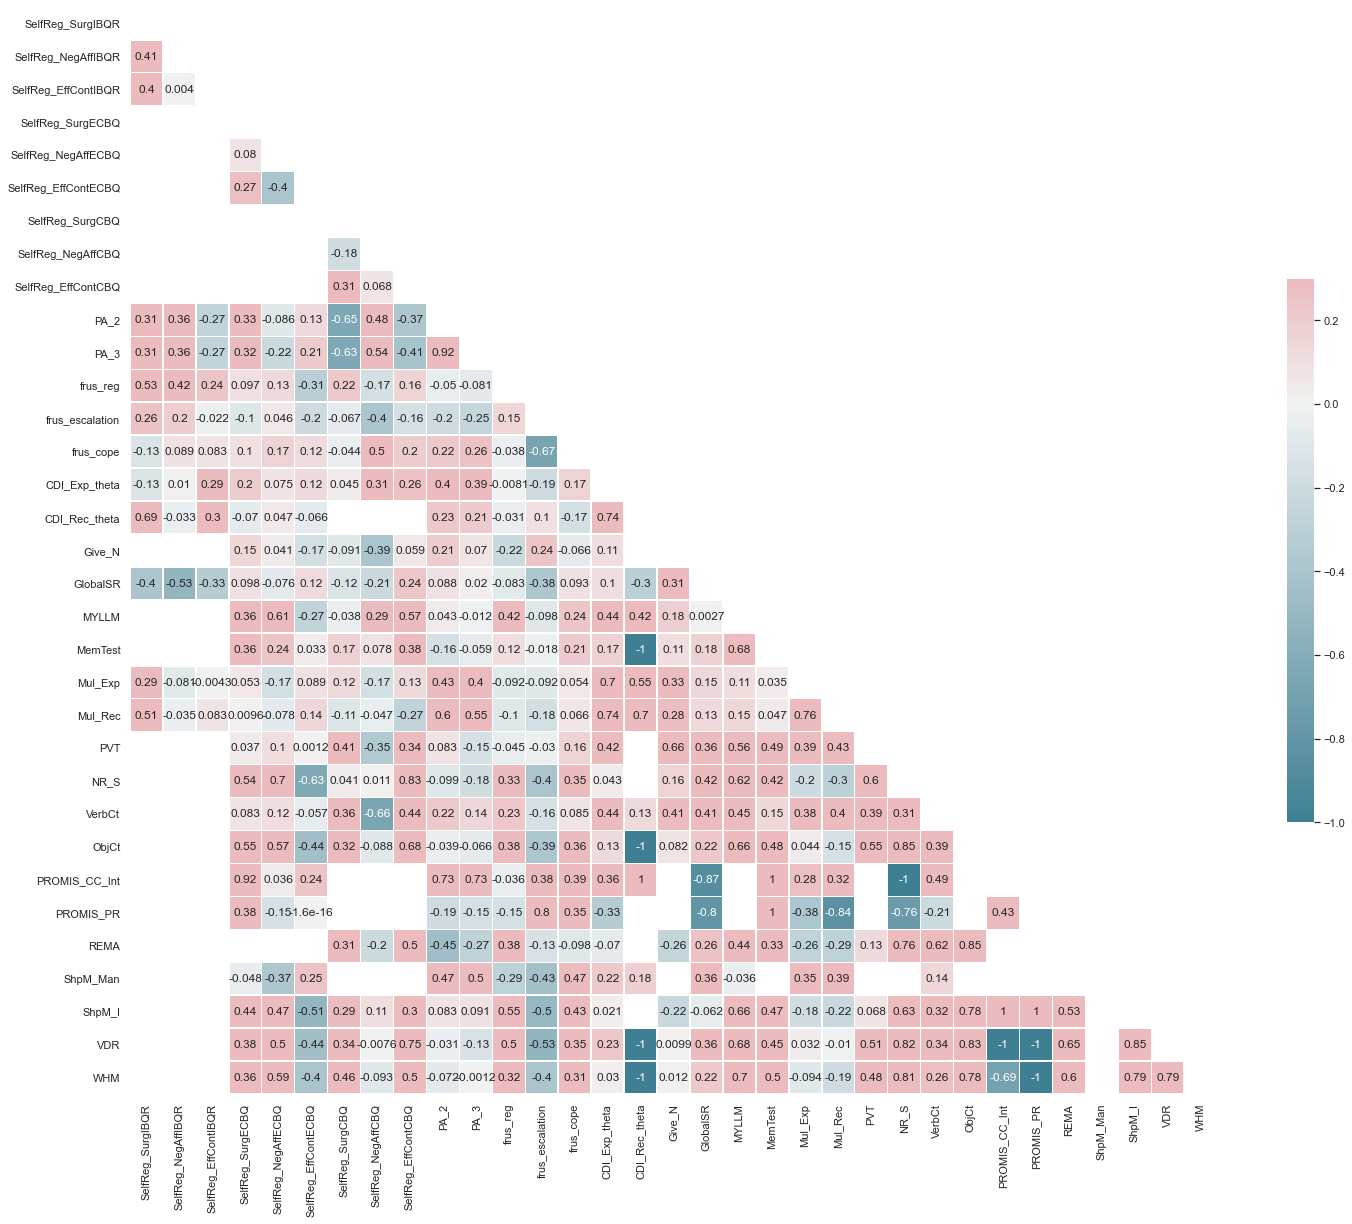

In [19]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)

# Compute the correlation matrix
corr = sc[interest].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(25, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})